<a href="https://colab.research.google.com/github/xinyang4O4/MAT421/blob/main/ModuleB_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 17.4 Lagrange Polynomial Interpolation

Lagrange polynomial interpolation is a kind of way to estimulate data into a one polynimial. This is referred to as a Lagrange polynomial, L(x), and it has the property $L(x_i) = y_i$ for i = 1, ..., n.

For Lagrange basis polynomials, $P_i(x)$, where $P_i(x) = \prod _{j=1, j\neq i}^n\frac{x-x_j}{x_i-x_j}$, and $L(x)=\sum^{n}_{i=1}y_iP_i(x)$.

Thus, $P_i(x_j) = 1$ when $i=j$ and $P_i(x_j) = 0$ when $i \neq j$.

For x = [0, 1, 2] and y = [2, 1, 4].

$P_1(x) = \frac{(x-1)(x-2)}{(0-1)(0-2)} = \frac{1}{2}(x^2-3x+2)$,

$P_1(x) = \frac{(x-0)(x-2)}{(1-0)(1-2)} = -x^2+2x$,

$P_1(x) = \frac{(x-0)(x-1)}{(2-0)(2-1)} = \frac{1}{2}(x^2-x)$.

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

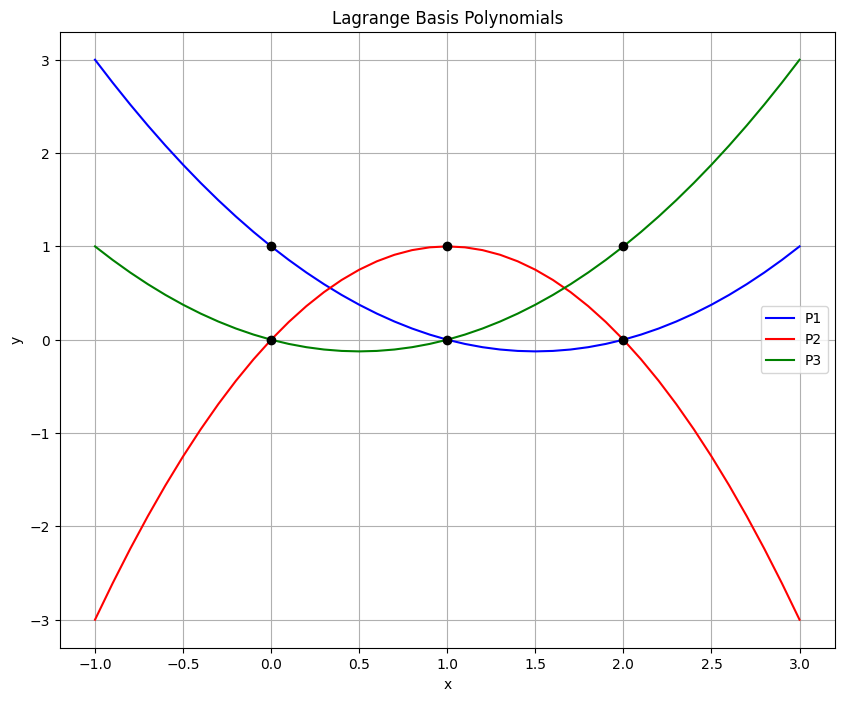

In [2]:
x = [0, 1, 2]
y = [2, 1, 4]
P1_coeff = [1,-1.5,.5]
P2_coeff = [0, 2,-1]
P3_coeff = [0,-.5,.5]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

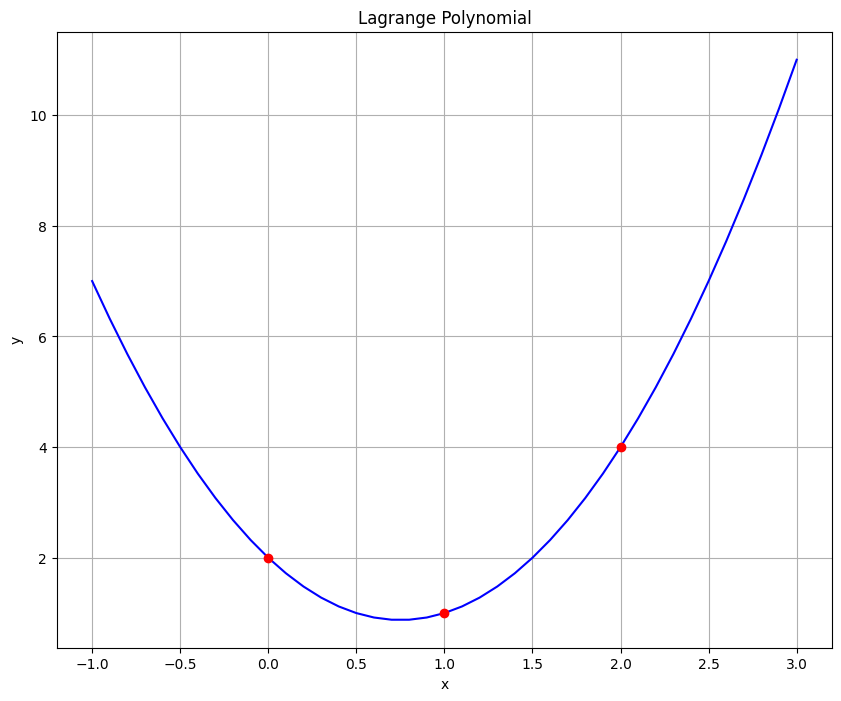

In [4]:
L = 2*P1 + P2 + 4*P3 #make the three parts into one polynomials

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 17.5 Newton's Polynomial Interpolation

Another way to estimulate data points is by Newton's polynomial called the Newton's polynomial interpolation.

$f(x) = a_0+a_1(x-x_0)+a_2(x-x_0)(x-x_1)+...+a_n(x-x_0)(x-x_{n-1})$

$f(x) = \sum^n_{i=0}a_in_i(x)$ where $n_i(x) = \prod^{i-1}_{j=0}(x-x_j)$

Divided difference is: $f[x_k,x_{k-1},...,x_1,x_0]= \frac{f[x_k,x_{k-1},...,x_2,x_1]-f[x_{k-1},x_{k-2},...,x_1,x_0]}{x_k-x_0}$

Then writing them in python code:

In [7]:
def divided_diff(x, y): #The function that calculates the divided difference
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x): #The function that calculates the newton polynomial
    '''
    evaluate the newton polynomial
    at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

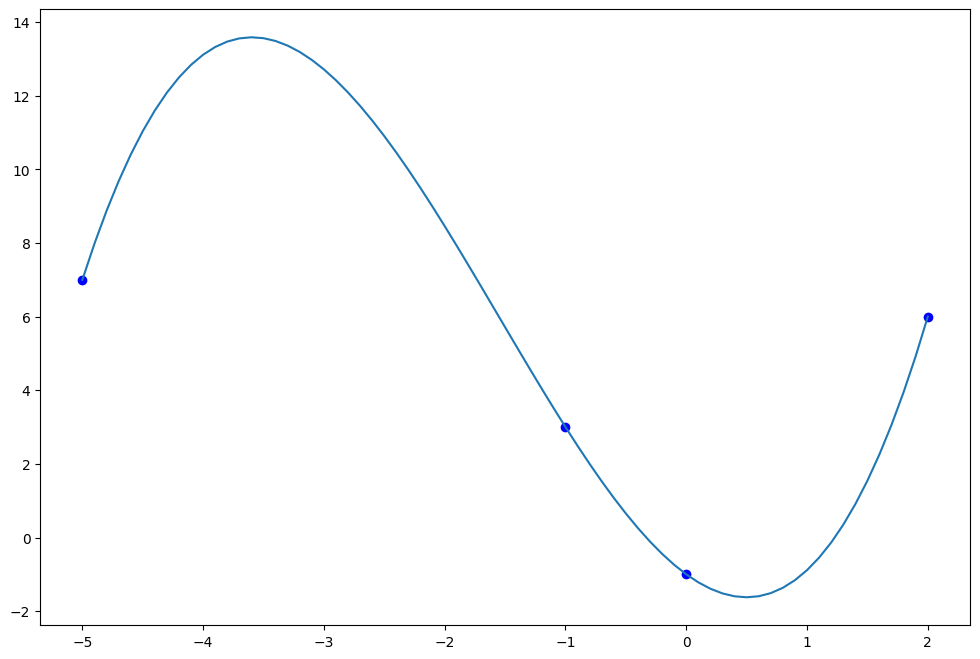

In [9]:
x = np.array([-5, -1, 0, 2])
y = np.array([7, 3, -1, 6])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)